# **Bài tập Colab**
# **Dự đoán điểm cuối kỳ**

> Dự đoán điểm cuối kỳ môn IT001 của sinh viên từ quá trình nộp bài wecode


In [ ]:
# Liên kết với drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/ML_Raw/wecode.csv')
data2 = pd.read_csv('/content/drive/MyDrive/ML_Raw/score_training.csv')

In [ ]:
# Xử lý dữ liệu - loại bỏ các giá trị rỗng khỏi cột CK trong file score_training
# Merge file wecode với file score_training theo user_id
data2 = data2[data2['CK'].notna()]
data2 = data2[data2.CK != '\xa0']
data2 = data2.rename(columns={"id": "user_id"})
merge1 = pd.merge(data1, data2, on='user_id')
merge1

id  assignment_id  problem_id  user_id  ...   TH   CK  TBM  TBTL
0           15              7          10     1439  ...  6.5  8.5  7.4  7.41
1           17              7          10     1439  ...  6.5  8.5  7.4  7.41
2           22              7           1     1439  ...  6.5  8.5  7.4  7.41
3           26              7          10     1439  ...  6.5  8.5  7.4  7.41
4           45              7          10     1439  ...  6.5  8.5  7.4  7.41
...        ...            ...         ...      ...  ...  ...  ...  ...   ...
192596  266033            383         313     1452  ...    8    6  6.6  7.05
192597  266034            383         318     1452  ...    8    6  6.6  7.05
192598  266036            383         319     1452  ...    8    6  6.6  7.05
192599  266037            383         317     1452  ...    8    6  6.6  7.05
192600  266038            383         316     1452  ...    8    6  6.6  7.05

[192601 rows x 18 columns]

# **Scatter plot 1**

> Thể hiện giữa số lượng bài nộp lần cuối (is_final == 1) có số phần trăm test đúng cao nhất (pre_score == 10000) và điểm số cuối kỳ (CK) của sinh viên (user_id)

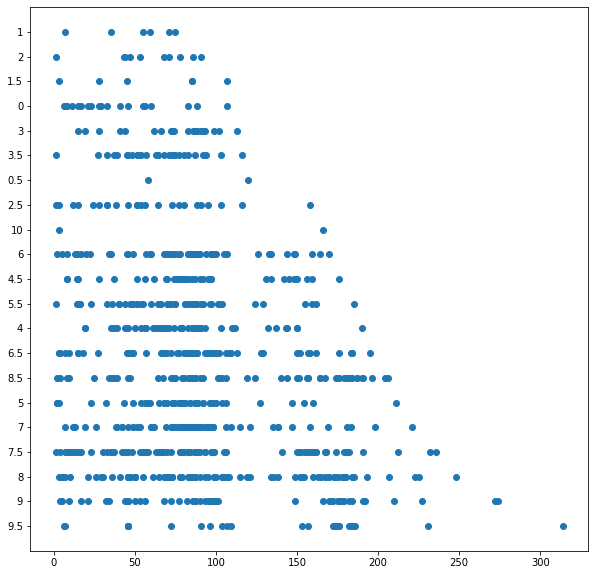

In [ ]:
# data2 = data2[data2['CK'].notna()]
# data1 = data1.loc[(data1['is_final'] == 1) & (data1['pre_score'] == 10000)]
# data2 = data2.rename(columns={"id": "user_id"})
# merge1 = pd.merge(data1, data2, on='user_id')


# test = merge1['user_id'].value_counts()
# test = test.to_frame().reset_index()
# test = test.rename(columns={"index": "user_id","user_id": "count"})

# merge2 = pd.merge(test, data2, on='user_id')
# plt.figure(figsize=(10,10))
# plt.scatter(merge2['count'].tolist(),merge2['CK'].tolist())
# plt.show()

# **Scatter plot 2**

> Thể hiện sự phân bố điểm cuối kỳ (CK) theo số phần trăm test đúng (pre_score) và hệ số nộp bài trễ (coefficient)

In [ ]:
# Kiểm tra dữ liệu - lấy những giá trị (không lặp) của điểm CK và làm tròn số
clus_ck = merge1[['user_id','CK']]
clus_ck['CK'].replace({"0.5": "1","1.5": "2","2.5": "3","3.5": "4", "4.5": "5","5.5": "6","6.5": "7","7.5": "8" ,"8.5": "9",'9.5':'10'}, inplace=True)
clus_ck = clus_ck[['CK']]
merge1['cluss'] = clus_ck

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
merge1['coefficient'].replace({'error':'-1'},inplace=True)

In [ ]:
# pre_score - coefficient ->>>> CK
X1 = merge1.iloc[:,[6,7]].values.astype(float)
Y1 = merge1.iloc[:,18].values.astype(float)

0 0.0-----1 1.0-----2 2.0-----3 3.0-----4 4.0-----5 5.0-----6 6.0-----7 7.0-----8 8.0-----9 9.0-----10 10.0-----

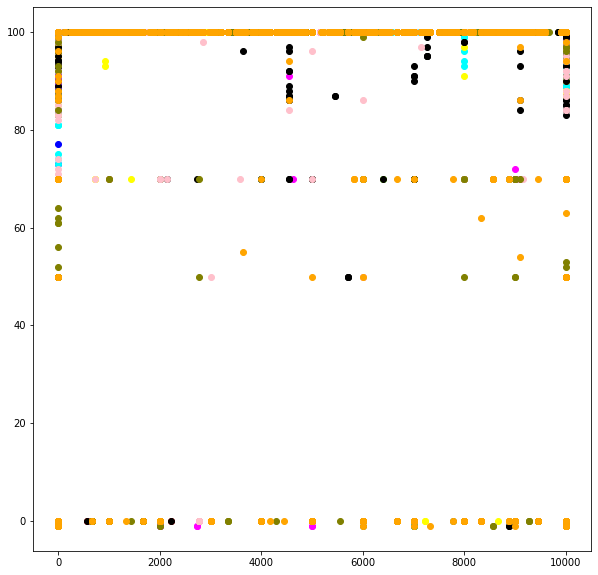

In [ ]:
# Tạo tập nhãn, ứng với mỗi nhãn gán một màu
# (1-red | 2-green | 3-blue | 4-cyan | 5-magenta | 6-yellow | 7-black | 8-pink | 9-oliver | 10-orange)
# Visualize điểm cuối kỳ (CK) theo cặp giá trị (Pre_score;coeffient)
from matplotlib.colors import ListedColormap
def VisualizingDataset(X_,Y_):
    X1=X_[:,0]
    X2=X_[:,1]
    for i,label in enumerate(np.unique(Y_)):
        print(i,label,end='-----')
        plt.scatter(X1[Y_==label],X2[Y_==label],color=ListedColormap(("red","green",'blue','cyan','magenta','yellow','black','pink','olive','orange'))(i),label=label)
plt.figure(figsize=(10,10))
VisualizingDataset(X1,Y1)

# **Scatter plot 3**

> Thể hiện giữa số lượng bài nộp lần cuối (is_final == 1) với số phần trăm test đúng (pre_score) bất kỳ và điểm số cuối kỳ (CK)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


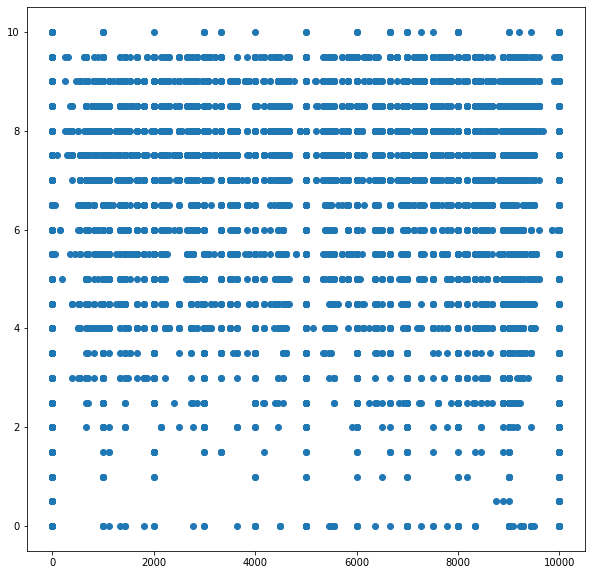

In [ ]:
#pre_score-is_finall==1 ->>>>- CK
tb2 = merge1.loc[(data1['is_final'] == 1)]
plt.figure(figsize=(10,10))
tb2["CK"] = tb2.CK.astype(float)
tb2=tb2.sort_values('CK')
plt.scatter(tb2['pre_score'].tolist(),tb2['CK'].tolist())
plt.show()

# **Scatter plot 4**

> Thể hiện giữa thời gian chạy chương trình (updated_at - created_at) của submission đã được chấm (status = SCORE) và điểm cuối kỳ (CK)

In [ ]:
df = pd.DataFrame(columns = ["times"])
from datetime import datetime
for i in range(0, len(merge1['created_at'].index)):
  date = (datetime.strptime(merge1.iloc[i][11],"%Y-%m-%d %H:%M:%S")-datetime.strptime(merge1.iloc[i][10],"%Y-%m-%d %H:%M:%S")).seconds
  df = df.append({'times':date}, ignore_index=True)
merge1.insert(3,"times",df,True)

In [ ]:
merge1

id  assignment_id  problem_id  times  ...   CK  TBM  TBTL  cluss
0           15              7          10  34769  ...  8.5  7.4  7.41      9
1           17              7          10  34641  ...  8.5  7.4  7.41      9
2           22              7           1  34492  ...  8.5  7.4  7.41      9
3           26              7          10  34381  ...  8.5  7.4  7.41      9
4           45              7          10  33735  ...  8.5  7.4  7.41      9
...        ...            ...         ...    ...  ...  ...  ...   ...    ...
192596  266033            383         313      9  ...    6  6.6  7.05      6
192597  266034            383         318     14  ...    6  6.6  7.05      6
192598  266036            383         319      9  ...    6  6.6  7.05      6
192599  266037            383         317      7  ...    6  6.6  7.05      6
192600  266038            383         316     10  ...    6  6.6  7.05      6

[192601 rows x 20 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


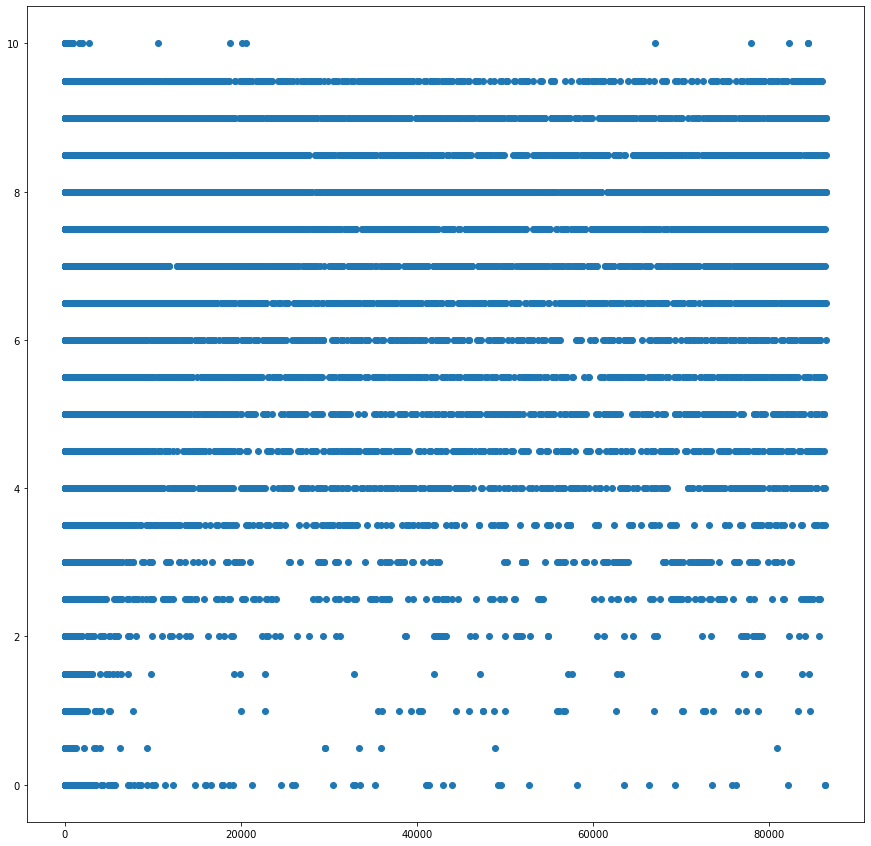

In [ ]:
#times->>>>>-CK
tb3 = merge1.loc[(merge1['status'] == 'SCORE')]
tb3["CK"] = tb3.CK.astype(float)
tb3=tb3.sort_values('CK')
plt.figure(figsize=(15,15))
plt.scatter(tb3['times'].tolist(),tb3['CK'].tolist())
plt.show()

# **Scatter plot 5**

> Thể hiện sự phân bố điểm cuối kỳ (CK) theo số phần trăm test đúng (pre_score) và thời gian chạy chương trình (updated_at - created_at) của submission đã được chấm (status = SCORE)

In [ ]:
np.unique(tb4['times'])

array([1, 2, 3, ..., 86378, 86393, 86399], dtype=object)

In [ ]:
tb4.iloc[:,[3,7]]

times  pre_score
10      32828          0
11      18958      10000
14      17663          0
16      16589       5000
17      16413          0
...       ...        ...
192596      9      10000
192597     14      10000
192598      9      10000
192599      7      10000
192600     10      10000

[158153 rows x 2 columns]

0 0.0-----1 1.0-----2 2.0-----3 3.0-----4 4.0-----5 5.0-----6 6.0-----7 7.0-----8 8.0-----9 9.0-----10 10.0-----

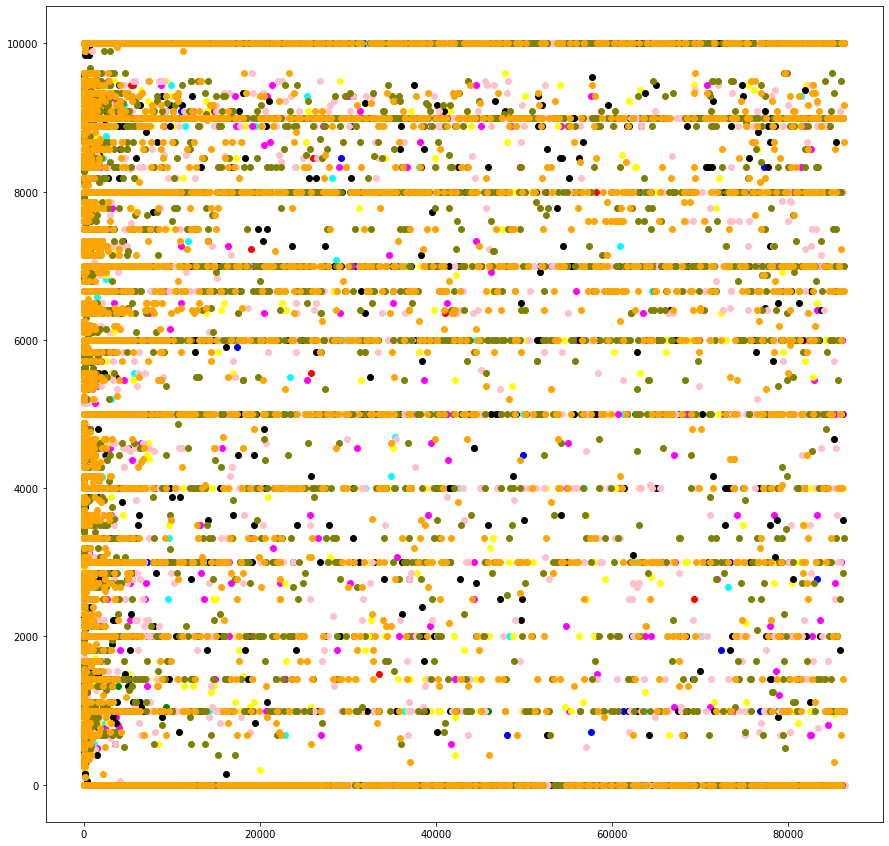

In [ ]:
tb4 = merge1.loc[(merge1['status'] == 'SCORE')]
X1 = tb4.iloc[:,[3,7]].values.astype(float)
y2 = tb4.iloc[:,19].values.astype(float)
plt.figure(figsize=(15,15))
VisualizingDataset(X1,y2)
plt.show()

In [ ]:
# tb4 = merge1.loc[(merge1['status'] == 'SCORE') & (merge1['is_final'] == 1) & (merge1['cluss'] != '10') & (merge1['cluss'] != '9')]
# X1 = tb4.iloc[:,[3,7]].values.astype(float)
# y2 = tb4.iloc[:,19].values.astype(float)
# plt.figure(figsize=(15,15))
# VisualizingDataset(X1,y2)
# plt.show()

# **Dự đoán điểm CK**
> Sử dụng thuật toán Linear Regression của thư viện Sklearn

In [ ]:
merge1

id  assignment_id  problem_id  times  ...   CK  TBM  TBTL  cluss
0           15              7          10  34769  ...  8.5  7.4  7.41      9
1           17              7          10  34641  ...  8.5  7.4  7.41      9
2           22              7           1  34492  ...  8.5  7.4  7.41      9
3           26              7          10  34381  ...  8.5  7.4  7.41      9
4           45              7          10  33735  ...  8.5  7.4  7.41      9
...        ...            ...         ...    ...  ...  ...  ...   ...    ...
192596  266033            383         313      9  ...    6  6.6  7.05      6
192597  266034            383         318     14  ...    6  6.6  7.05      6
192598  266036            383         319      9  ...    6  6.6  7.05      6
192599  266037            383         317      7  ...    6  6.6  7.05      6
192600  266038            383         316     10  ...    6  6.6  7.05      6

[192601 rows x 20 columns]

In [ ]:
np.unique(merge1['coefficient'])

array(['-1', '0', '100', '50', '52', '53', '54', '55', '56', '61', '62',
       '63', '64', '70', '71', '72', '73', '74', '75', '77', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '99'], dtype=object)

In [ ]:
merge1['coefficient']=merge1['coefficient'].replace({-1: '-1'})

In [ ]:
#Sử dụng dữ liệu ở các cột "times", "is_final",	"status",	"pre_score",	"coefficient" và "CK" làm tập train
df_X = merge1.iloc[:,[5,6,7,8,3]]
df_Y = merge1.iloc[:,[16]].values

In [ ]:
#Chuẩn hóa dữ liệu
df_X = df_X.fillna('nan').values

In [ ]:
print(np.unique(df_X[:,0]))
print(np.unique(df_X[:,1].astype(str)))
print(np.unique(df_X[:,2]))
print(np.unique(df_X[:,3]).astype(float))
print(np.unique(df_X[:,4]))

[0 1]
['Compilation Error' 'SCORE' 'nan']
[0 50 100 150 200 238 250 256 300 312 333 344 400 454 476 487 500 512 526
 555 600 625 666 689 700 714 769 800 833 909 937 950 952 1000 1025 1034
 1052 1100 1111 1190 1200 1206 1212 1250 1282 1333 1363 1428 1463 1481
 1500 1538 1562 1600 1650 1666 1707 1794 1800 1818 1875 1904 1951 2000
 2051 2083 2105 2142 2187 2195 2222 2272 2307 2380 2400 2413 2439 2500
 2564 2592 2600 2619 2631 2666 2682 2727 2758 2777 2800 2820 2833 2857
 2926 2962 3000 3076 3095 3103 3125 3181 3200 3333 3414 3448 3500 3529
 3571 3583 3589 3600 3636 3703 3750 3809 3846 3888 4000 4047 4090 4100
 4102 4146 4166 4285 4310 4358 4375 4400 4444 4500 4545 4615 4666 4687
 4761 4800 4814 4848 4871 4878 5000 5151 5185 5200 5238 5333 5384 5454
 5500 5555 5583 5600 5625 5666 5700 5714 5757 5789 5800 5833 5850 5853
 5897 5900 5909 5925 5937 6000 6060 6111 6153 6190 6200 6206 6250 6315
 6363 6400 6410 6428 6450 6500 6550 6585 6666 6800 6818 6829 6842 6875
 6896 6923 6969 7000 7050 7073 

In [ ]:
df_X[:,3] = df_X[:,3].astype(float)

In [ ]:
#Tiến hành dự đoán
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
le.fit(df_X[:, 1])
df_X[:, 1] = le.transform(df_X[:, 1])
enc = OneHotEncoder(handle_unknown='ignore')
df1 = enc.fit_transform(df_X[:,1].reshape(-1,1)).toarray()
X_test  = np.concatenate((df1, df_X), axis = 1)

In [ ]:
X_test[1,:]

array([1.0, 0.0, 0.0, 0, 'Compilation Error', 0, '100', 34641],
      dtype=object)

In [ ]:
X_test = np.delete(X_test, 4, 1)  # delete second column of C

In [ ]:
X_test[1:,]

array([[1.0, 0.0, 0.0, ..., 0, 100.0, 34641],
       [1.0, 0.0, 0.0, ..., 0, 100.0, 34492],
       [1.0, 0.0, 0.0, ..., 0, 100.0, 34381],
       ...,
       [0.0, 1.0, 0.0, ..., 10000, 100.0, 9],
       [0.0, 1.0, 0.0, ..., 10000, 100.0, 7],
       [0.0, 1.0, 0.0, ..., 10000, 100.0, 10]], dtype=object)

In [ ]:
print(np.unique(X_test[:,0]))
print(np.unique(X_test[:,1].astype(str)))
print(np.unique(X_test[:,2]))
print(np.unique(X_test[:,3]).astype(float))
print(np.unique(X_test[:,4]))
print(np.unique(X_test[:,5]))
print(np.unique(X_test[:,6]))

[0.0 1.0]
['0.0' '1.0']
[0.0 1.0]
[0. 1.]
[0 50 100 150 200 238 250 256 300 312 333 344 400 454 476 487 500 512 526
 555 600 625 666 689 700 714 769 800 833 909 937 950 952 1000 1025 1034
 1052 1100 1111 1190 1200 1206 1212 1250 1282 1333 1363 1428 1463 1481
 1500 1538 1562 1600 1650 1666 1707 1794 1800 1818 1875 1904 1951 2000
 2051 2083 2105 2142 2187 2195 2222 2272 2307 2380 2400 2413 2439 2500
 2564 2592 2600 2619 2631 2666 2682 2727 2758 2777 2800 2820 2833 2857
 2926 2962 3000 3076 3095 3103 3125 3181 3200 3333 3414 3448 3500 3529
 3571 3583 3589 3600 3636 3703 3750 3809 3846 3888 4000 4047 4090 4100
 4102 4146 4166 4285 4310 4358 4375 4400 4444 4500 4545 4615 4666 4687
 4761 4800 4814 4848 4871 4878 5000 5151 5185 5200 5238 5333 5384 5454
 5500 5555 5583 5600 5625 5666 5700 5714 5757 5789 5800 5833 5850 5853
 5897 5900 5909 5925 5937 6000 6060 6111 6153 6190 6200 6206 6250 6315
 6363 6400 6410 6428 6450 6500 6550 6585 6666 6800 6818 6829 6842 6875
 6896 6923 6969 7000 7050 7073 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(X_test, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
Y_predict = regressor.predict(X_test)

In [ ]:
Y_predict.shape

(192601, 1)

> Tính Mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_predict,Y)

3.9016344170557473